In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm, powerlaw
from sklearn.neighbors import KernelDensity

In [84]:
cols = (
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
)

filename = "magic04.data"

df = pd.read_csv(filename, names=cols)

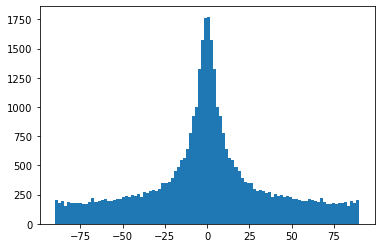

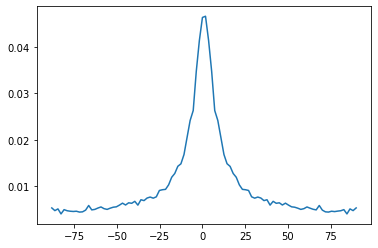

In [85]:
mirrored_fAlpha = np.append(np.array(df["fAlpha"]), -df["fAlpha"])
hist, xvals, patches = plt.hist(mirrored_fAlpha, bins=100)
plt.show()
plt.plot(
    xvals[1:], 
    #len(mirrored_fAlpha)*cauchy.pdf(xvals, loc=0, scale=25),
    hist / len(mirrored_fAlpha)
)

In [86]:
params, cov = curve_fit(
    cauchy.pdf,
    xvals[1:], 
    hist / len(mirrored_fAlpha),
    p0=[0, 10.]
)
loc, scale = params
print(loc, scale)

0.9032197035836343 7.569720881171095


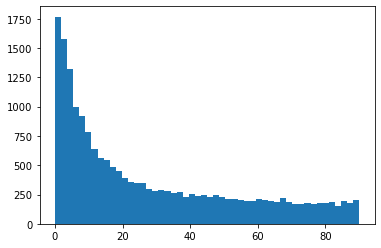

In [136]:
hist, xvals, patches = plt.hist(
    df["fAlpha"],
    bins=50,
)
plt.show()

[0.15623006 0.62474418]
[       inf 0.10821428 0.07018073 0.05447608 0.04551464 0.03959197
 0.03532963 0.03208592 0.02951783 0.02742377 0.02567677 0.02419249
 0.0229125  0.0217949  0.02080884 0.01993097 0.01914334 0.01843184
 0.01778527 0.01719455 0.01665228 0.01615235 0.01568967 0.01525995
 0.01485955 0.01448537 0.01413475 0.01380538 0.01349525 0.01320261
 0.01292593 0.01266383 0.01241512 0.01217873 0.01195369 0.01173916
 0.01153436 0.01133861 0.01115126 0.01097176 0.01079958 0.01063426
 0.01047536 0.01032249 0.0101753  0.01003344 0.00989661 0.00976453
 0.00963693 0.00951359 0.00939427]


/home/jeremy/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


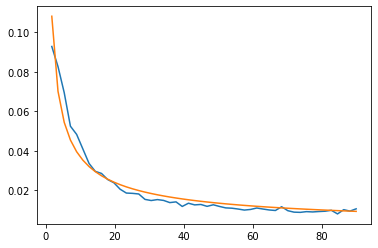

In [139]:
def power(x, a, k):
    return a*x**(-k)

params, cov = curve_fit(
    power,
    xvals[1:],
    hist / len(df["fAlpha"]),
    p0=[1., 2.],
)
print(params)
plt.plot(xvals[1:], hist / len(df["fAlpha"]))
#plt.show()
plt.plot(xvals[1:], power(xvals[1:], *params))
print(power(xvals, *params))

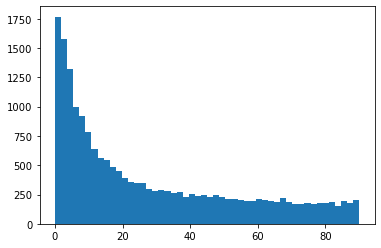

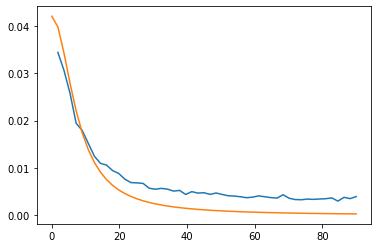

In [98]:
#x = np.linspace(0, 70, 100)
positivehist, xvals2, patches = plt.hist(df["fAlpha"], bins=50)
plt.show()
plt.plot(xvals2[1:], positivehist / (2.7*len(df["fAlpha"])))
plt.plot(xvals2, cauchy.pdf(xvals2, 0, scale))

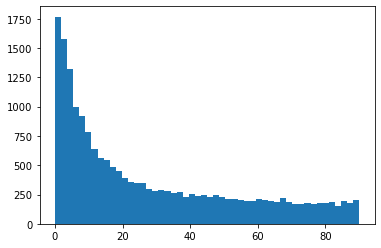

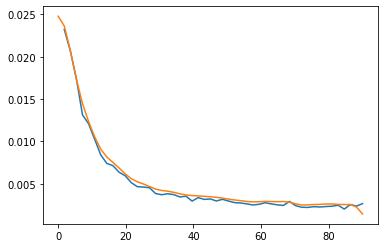

In [129]:
kde = KernelDensity(
    kernel="gaussian", 
    bandwidth=2
).fit(mirrored_fAlpha[:, np.newaxis])
hist, xvals, patches = plt.hist(
    df["fAlpha"],
    bins=50
)
plt.show()
#xvals = np.linspace(0, 70, len(df["fAlpha"]))
yvals = np.exp(kde.score_samples(xvals[:, np.newaxis]))
plt.plot(xvals[1:], hist / (4*len(df["fAlpha"])))
plt.plot(xvals, yvals)

In [14]:
np.linspace(-5, 10, 1000)[:, np.newaxis][:, 0]

array([-5.        , -4.98498498, -4.96996997, -4.95495495, -4.93993994,
       -4.92492492, -4.90990991, -4.89489489, -4.87987988, -4.86486486,
       -4.84984985, -4.83483483, -4.81981982, -4.8048048 , -4.78978979,
       -4.77477477, -4.75975976, -4.74474474, -4.72972973, -4.71471471,
       -4.6996997 , -4.68468468, -4.66966967, -4.65465465, -4.63963964,
       -4.62462462, -4.60960961, -4.59459459, -4.57957958, -4.56456456,
       -4.54954955, -4.53453453, -4.51951952, -4.5045045 , -4.48948949,
       -4.47447447, -4.45945946, -4.44444444, -4.42942943, -4.41441441,
       -4.3993994 , -4.38438438, -4.36936937, -4.35435435, -4.33933934,
       -4.32432432, -4.30930931, -4.29429429, -4.27927928, -4.26426426,
       -4.24924925, -4.23423423, -4.21921922, -4.2042042 , -4.18918919,
       -4.17417417, -4.15915916, -4.14414414, -4.12912913, -4.11411411,
       -4.0990991 , -4.08408408, -4.06906907, -4.05405405, -4.03903904,
       -4.02402402, -4.00900901, -3.99399399, -3.97897898, -3.96

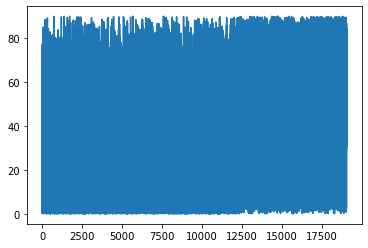

In [16]:
plt.plot(df["fAlpha"])